# Data Cleaning

### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("./spendtracker_bis.csv", delimiter = ";")
data.Region.fillna("Worldwide", inplace = True)
data = data[(data.Component == "Analog IC")]
data.reset_index(inplace = True, drop = True)
data = data.iloc[:, 1:-2]

data.Value = data.Value.apply(lambda x : float(x.replace(',', '.')))
data

,Measure,Region,Device,Market,Component,SubMarket,Headquarter,CompanyName,Consumption,PeriodCode,Value
0,Net Spend – USD (M),Worldwide,Amplifier/Comparator,Industrial,Analog IC,Medical,NaN,Abbott Laboratories,NaN,Y2018,1.3112
1,Net Spend – USD (M),Worldwide,Amplifier/Comparator,Industrial,Analog IC,Medical,NaN,Abbott Laboratories,NaN,Y2019,1.3826
2,Net Spend – USD (M),Worldwide,Amplifier/Comparator,Industrial,Analog IC,Medical,NaN,Abbott Laboratories,NaN,Y2020,1.6642
3,Net Spend – USD (M),Worldwide,Amplifier/Comparator,Industrial,Analog IC,Medical,NaN,Abbott Laboratories,NaN,Y2021,2.8252
4,Net Spend – USD (M),Worldwide,Amplifier/Comparator,Industrial,Analog IC,Medical,NaN,Abbott Laboratories,NaN,Y2022,3.2331
...,...,...,...,...,...,...,...,...,...,...,...
56345,Total Regional Spend Revenue – USD (M),Japan,Voltage Regulator/Reference,Wireless Communications,Analog IC,NaN,NaN,ZTE,NaN,Y2020,0.0000
56346,Total Regional Spend Revenue – USD (M),Japan,Voltage Regulator/Reference,Wireless Communications,Analog IC,NaN,NaN,ZTE,NaN,Y2021,0.0000
56347,Total Regional Spend Revenue – USD (M),Japan,Voltage Regulator/Reference,Wireless Communications,Analog IC,NaN,NaN,ZTE,NaN,Y2022,0.0000
56348,Total Regional Spend Revenue – USD (M),Japan,Voltage Regulator/Reference,Wireless Communications,Analog IC,NaN,NaN,ZTE,NaN,Y2023,0.0000


In [5]:
nb_submarket = data[(data.Region == "Worldwide")].loc[:, ["SubMarket", "CompanyName", "Market"]].groupby(["CompanyName", "Market"]).nunique()
nb_submarket

,CompanyName,Market,SubMarket
0,AMETEK,Industrial,4
1,ASML,Industrial,2
2,AU Optronics,Computer Peripherals & Storage,1
3,AU Optronics,Industrial,1
4,Abbott Laboratories,Industrial,1
...,...,...,...
257,ZTE,Wireless Communications,4
258,Zebra Technologies,Computer Peripherals & Storage,1
259,Zebra Technologies,Computer Platforms,2
260,Zebra Technologies,Wired Communications,2


In [178]:
nb_submarket[(nb_submarket.SubMarket > 1)]

SubMarket
CompanyName        Market                            
AMETEK             Industrial                       4
ASML               Industrial                       2
Advantest          Industrial                       2
Alps Alpine        Automotive                       2
                   Wireless Communications          2
...                                               ...
ZTE                Wired Communications             3
                   Wireless Communications          4
Zebra Technologies Computer Platforms               2
                   Wired Communications             2
                   Wireless Communications          2

[158 rows x 1 columns]

In [179]:
nb_market = data[(data.Region == "Worldwide")].loc[:, ["CompanyName", "Market"]].groupby(["CompanyName"]).nunique().sum()
nb_market

Market    262
dtype: int64

In [180]:
nb_submarket[(nb_submarket.index == ("AMETEK", "Industrial"))]

,,SubMarket
CompanyName,Market,
AMETEK,Industrial,4


In [181]:
data[(data.CompanyName == "AMETEK") & (data.Market == "Industrial") & (data.Region == "Worldwide")].groupby("SubMarket").sum()

,Headquarter,Consumption,Value
SubMarket,,,
Manufacturing Equipment,0.0,0.0,93.9504
Military/Aerospace,0.0,0.0,13.8428
Other Industrial,0.0,0.0,9.5530
Test & Measurement,0.0,0.0,154.0569


## Value Per SubMarket

### Get the Pourcentage Matrix

In [182]:
total_submarket = data[(data.Region == "Worldwide")].loc[:, ["SubMarket", "CompanyName", "PeriodCode", "Device", "Value"]].groupby(["CompanyName", "SubMarket", "PeriodCode", "Device"]).sum()
total_market = data[(data.Region == "Worldwide")].loc[:, ["Market", "CompanyName", "PeriodCode", "Device", "Value"]].groupby(["CompanyName", "Market", "PeriodCode", "Device"]).sum()

In [183]:
pourcentage_data = data[(data.Region == "Worldwide")].loc[:, ["CompanyName", "Market", "SubMarket", "PeriodCode", "Device"]]
pourcentage = []
for x in pourcentage_data.index:
    pourcentage.append(total_submarket.loc[(pourcentage_data.loc[x, "CompanyName"], pourcentage_data.loc[x, "SubMarket"], pourcentage_data.loc[x, "PeriodCode"], pourcentage_data.loc[x, "Device"])].values[0]/
                       total_market.loc[(pourcentage_data.loc[x, "CompanyName"], pourcentage_data.loc[x, "Market"], pourcentage_data.loc[x, "PeriodCode"], pourcentage_data.loc[x, "Device"])].values[0])
pourcentage_data["pourcentage"] = pourcentage
pourcentage_data.drop_duplicates(inplace = True)
pourcentage_data.sort_values(by = ['CompanyName', 'Market', 'SubMarket'], inplace = True)
pourcentage_data

<ipython-input-183-df1f623a1754>:4: RuntimeWarning: invalid value encountered in double_scalars
  pourcentage.append(total_submarket.loc[(pourcentage_data.loc[x, "CompanyName"], pourcentage_data.loc[x, "SubMarket"], pourcentage_data.loc[x, "PeriodCode"], pourcentage_data.loc[x, "Device"])].values[0]/


,CompanyName,Market,SubMarket,PeriodCode,Device,pourcentage
2065,AMETEK,Industrial,Manufacturing Equipment,Y2018,Amplifier/Comparator,0.241520
2066,AMETEK,Industrial,Manufacturing Equipment,Y2019,Amplifier/Comparator,0.258890
2067,AMETEK,Industrial,Manufacturing Equipment,Y2020,Amplifier/Comparator,0.269858
2068,AMETEK,Industrial,Manufacturing Equipment,Y2021,Amplifier/Comparator,0.280795
2069,AMETEK,Industrial,Manufacturing Equipment,Y2022,Amplifier/Comparator,0.291782
...,...,...,...,...,...,...
54770,Zebra Technologies,Wireless Communications,Other Wireless,Y2020,Voltage Regulator/Reference,0.364287
54771,Zebra Technologies,Wireless Communications,Other Wireless,Y2021,Voltage Regulator/Reference,0.379845
54772,Zebra Technologies,Wireless Communications,Other Wireless,Y2022,Voltage Regulator/Reference,0.349199
54773,Zebra Technologies,Wireless Communications,Other Wireless,Y2023,Voltage Regulator/Reference,0.344549


### Get the Proxy Value

In [184]:
final_data = data.copy()
final_data = data[(data.Region != "Worldwide")].loc[:, ["Region", "CompanyName", "Device", "Market", "PeriodCode", "Value"]]
final_data

,Region,CompanyName,Device,Market,PeriodCode,Value
35,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,Y2018,0.8392
36,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,Y2019,0.8849
37,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,Y2020,1.0651
38,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,Y2021,1.8081
39,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,Y2022,2.0692
...,...,...,...,...,...,...
56345,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2020,0.0000
56346,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2021,0.0000
56347,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2022,0.0000
56348,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2023,0.0000


In [185]:
final_df = []
for x in final_data.index:
    for y in pourcentage_data[(pourcentage_data.CompanyName == final_data.loc[x, "CompanyName"]) &
                              (pourcentage_data.Market == final_data.loc[x, "Market"]) &
                              (pourcentage_data.Device == final_data.loc[x, "Device"]) &
                               (pourcentage_data.PeriodCode == final_data.loc[x, "PeriodCode"])].SubMarket.unique():
        row = []
        row += list(final_data.loc[x, :])
        row.append(y)
        row.append(pourcentage_data[(pourcentage_data.CompanyName == final_data.loc[x, "CompanyName"]) &
                              (pourcentage_data.Market == final_data.loc[x, "Market"]) &
                              (pourcentage_data.Device == final_data.loc[x, "Device"]) &
                              (pourcentage_data.PeriodCode == final_data.loc[x, "PeriodCode"]) &
                              (pourcentage_data.SubMarket == y)].pourcentage.values[0])
        final_df.append(row)

final_df = pd.DataFrame(final_df, columns = ["Region", "CompanyName", "Device", "Market", "PeriodCode", "Value", " SubMarket", "Pourcentage"])
final_df["Value"] = final_df.Value * final_df.Pourcentage
final_df.drop(["Pourcentage"], axis = 1, inplace = True)
final_df.Value.fillna(0.0, inplace = True)
final_df

,Region,CompanyName,Device,Market,PeriodCode,Value,SubMarket
0,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,Y2018,0.8392,Medical
1,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,Y2019,0.8849,Medical
2,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,Y2020,1.0651,Medical
3,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,Y2021,1.8081,Medical
4,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,Y2022,2.0692,Medical
...,...,...,...,...,...,...,...
78675,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2023,0.0000,Other Wireless
78676,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Handset
78677,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Infrastructure
78678,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Media Tablets


In [187]:
final_df.to_csv("cleaned_data.csv")

### Other way

In [188]:
submarket = pourcentage_data.SubMarket.unique()
submarket

array(['Manufacturing Equipment', 'Power & Energy', 'Military/Aerospace',
       'Other Industrial', 'Test & Measurement', 'STB', 'Carrier',
       'Enterprise/SOHO', 'Other Peripherals', 'Medical', 'Other Storage',
       'Data Center Servers', 'Desktop PCs', 'Notebook PCs',
       'Other Computer Products', 'Tablet PCs', 'Other Consumer',
       'Handset', 'Media Tablets', 'Other Auto & Aftermarket',
       'Smart Cards', 'Auto ADAS', 'Auto Infotainment', 'Auto Powertrain',
       'Connected Consumer', 'Infrastructure', 'Other Wireless', 'Audio',
       'Appliance', 'TV', 'Other Wired', 'DC Network & Threat Mitigation',
       'Flash Cards/Drives', 'Video Games', 'HDD'], dtype=object)

In [202]:
final_data_bis = data.copy()
final_data_bis = final_data_bis[(final_data_bis.Region != "Worldwide")].loc[:, ["Region", "CompanyName", "Device", "Market", "PeriodCode", "Value"]]
final_df_bis = []
for x in final_data_bis.index:
    for sub in submarket:
        row = []
        row += list(final_data_bis.loc[x, :])
        row.appmpend(sub)
        final_df_bis.append(row)

final_df_bis = pd.DataFrame(final_df_bis, columns = ["Region", "CompanyName", "Device", "Market", "PeriodCode", "Value", "SubMarket"])
final_df_bis
    

,Region,CompanyName,Device,Market,PeriodCode,Value,SubMarket
0,Americas,Adient,Amplifier/Comparator,Automotive,Y2018,1.0385,Manufacturing Equipment
1,Americas,Adient,Amplifier/Comparator,Automotive,Y2018,1.0385,Power & Energy
2,Americas,Adient,Amplifier/Comparator,Automotive,Y2018,1.0385,Military/Aerospace
3,Americas,Adient,Amplifier/Comparator,Automotive,Y2018,1.0385,Other Industrial
4,Americas,Adient,Amplifier/Comparator,Automotive,Y2018,1.0385,Test & Measurement
...,...,...,...,...,...,...,...
2582295,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Other Wired
2582296,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,DC Network & Threat Mitigation
2582297,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Flash Cards/Drives
2582298,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Video Games


In [203]:
final = final_df_bis.merge(pourcentage_data, how = 'left', on = ["CompanyName", "Device", "Market", "PeriodCode", "SubMarket"])
final = final[final['pourcentage'].notna()]
final.Value = final.Value * final.pourcentage
final.drop("pourcentage", axis = 1, inplace = True)

## Regression

In [304]:
clean = pd.read_csv("./cleaned_data.csv")
clean

,Unnamed: 0,Region,CompanyName,Device,Market,PeriodCode,Value,SubMarket
0,0,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,Y2018,0.8392,Medical
1,1,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,Y2019,0.8849,Medical
2,2,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,Y2020,1.0651,Medical
3,3,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,Y2021,1.8081,Medical
4,4,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,Y2022,2.0692,Medical
...,...,...,...,...,...,...,...,...
78675,78675,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2023,0.0000,Other Wireless
78676,78676,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Handset
78677,78677,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Infrastructure
78678,78678,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Media Tablets


In [305]:
clean.PeriodCode = clean.PeriodCode.apply(lambda x: int(x[1:]))
clean = clean.iloc[:, 1:]
clean['SubMarket'] = clean[" SubMarket"]
clean.drop([" SubMarket"], axis = 1, inplace = True)

### Features Pre Processing

In [276]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import preprocessing
from scipy import stats
import statsmodels.api as sm

/Users/leforestierlucas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/leforestierlucas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### TRY 1

In [55]:
data_reg = pd.get_dummies(clean, columns=['Device', 'Region', 'SubMarket'])
data_reg = data_reg.iloc[:, 2:]
data_reg

,PeriodCode,Value,Device_Amplifier/Comparator,Device_Analog Application Specific IC,Device_Data Converters,Device_Interface,Device_Voltage Regulator/Reference,Region_Americas,Region_Asia & Oceania (exc. Japan),Region_EMEA,...,SubMarket_Other Storage,SubMarket_Other Wired,SubMarket_Other Wireless,SubMarket_Power & Energy,SubMarket_STB,SubMarket_Smart Cards,SubMarket_TV,SubMarket_Tablet PCs,SubMarket_Test & Measurement,SubMarket_Video Games
0,2018,1.0385,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,1.0652,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,0.8038,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021,1.1561,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,1.1376,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144055,2023,0.0000,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
144056,2024,0.0000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144057,2024,0.0000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144058,2024,0.0000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X_train, X_test = data_reg[(data_reg.PeriodCode <= 2022)], data_reg[(data_reg.PeriodCode >= 2023)]
y_train = np.array(X_train.pop("Value"))
y_test = np.array(X_test.pop("Value"))
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)


reg = linear_model.Lasso(alpha=0.1).fit(X_scaled, y_train)
reg.score(X_scaled, y_train)

0.020900864870299074

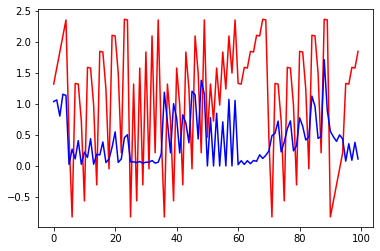

In [58]:
plt.plot(reg.predict(X_scaled[:100]), color = "r")
plt.plot(y_train[:100], color = "b")
plt.show()

In [44]:
y_train[:100]

0      1.038500
1      1.065200
2      0.803800
3      1.156100
4      1.137600
         ...   
133    0.077404
134    0.357896
135    0.091523
136    0.380077
137    0.112388
Name: Value, Length: 100, dtype: float64

### Try 2

In [243]:
company_name = clean.CompanyName.unique()
company_name

array(['Abbott Laboratories', 'Advantest', 'Agilent Technologies',
       'Airbus Group', 'Alps Alpine', 'Amazon', 'AMETEK', 'Anritsu',
       'Apple', 'Applied Materials', 'Aptiv PLC', 'ASML', 'AU Optronics',
       'BAE', 'Baxter International', 'Boeing', 'BorgWarner', 'Bose',
       'Boston Scientific', 'Bruker', 'Canon', 'Carrier',
       'Ciena Corporation', 'Cisco Systems', 'CommScope', 'Continental',
       'Dassault Aviation', 'Deere & Company', 'Dell Technologies',
       'Delta Electronics', 'Denso', 'Eaton', 'Elbit Systems',
       'Emerson Electric', 'Endress & Hauser', 'Ericsson',
       'Facebook (Meta)', 'Fanuc Corporation', 'Fortive',
       'Fresenius Medical Care', 'Fujifilm', 'Fujitsu', 'Garmin',
       'General Dynamics', 'General Electric', 'Gree Electric Appliances',
       'Harman International', 'Hewlett-Packard', 'Hisense Group',
       'Hitachi', 'Honeywell', 'Horiba', 'Huawei Technologies',
       'Hyundai Mobis', 'IBM', 'Intel', 'Intuitive Surgical', 'Itron'

In [291]:
def plot_reg(df, company_name, region):
    if region != "all":
        assert len(df[(df.CompanyName == company_name) & (df.Region.str.startswith(region))]) > 1, "No compatible Company/Region"

    if region == "all":
        print(f"Aggregation of {df[(df.CompanyName == company_name) & (df.Value > 0.0)].Region.unique()}")
        data = df.loc[:, ['CompanyName', 'Market', 'PeriodCode', 'Value']].groupby(["CompanyName", "Market", "PeriodCode"]).sum().reset_index()
        data = data[(data.CompanyName == company_name)]
        
        data.sort_values(['Market', 'PeriodCode'])
        list_market = data.Market.unique()
        for mark in list_market:
            y_train = np.array(data[(data.Market == mark)].Value)
            X_train = np.array([i for i in range(2018, 2025)]).reshape(-1, 1)
            X_bis = sm.add_constant(X_train)
            est = sm.OLS(y_train, X_bis)
            reg = est.fit()
            #plt.plot([i for i in range(2018, 2028)], np.concatenate([y_train, np.array(reg.predict(np.array([2025, 2026, 2027]).reshape(-1, 1)))]), color = "r")
            plt.scatter([i for i in range(2018, 2025)], y_train, color = "r")
            X_test = np.array([2025, 2026, 2027]).reshape(-1, 1)
            X_test_bis = sm.add_constant(X_test)
            plt.scatter([i for i in range(2025, 2028)], np.array(reg.predict(X_test_bis)), color = "b", label = "Extended Forecast")
            plt.plot([i for i in range(2018, 2028)], [reg.params[0] + x*reg.params[1] for x in range(2018, 2028)], color = "k", label = f"P-value = {round(reg.pvalues[1], 3)}")
            plt.title(f"Evolution of Spending for {company_name} in {mark} Worldwide")
            plt.legend()
            plt.show()

    else : 
        data = df[(df.Region.str.startswith(region))]
        data = data.loc[:, ['CompanyName', 'Market', 'PeriodCode', 'Value']].groupby(["CompanyName", "Market", "PeriodCode"]).sum().reset_index()
        data = data[(data.CompanyName == company_name)]
        data.sort_values(['Market', 'PeriodCode'])
        list_market = data.Market.unique()
        for mark in list_market:
            y_train = np.array(data[(data.Market == mark)].Value)
            X_train = np.array([i for i in range(2018, 2025)]).reshape(-1, 1)
            X_bis = sm.add_constant(X_train)
            est = sm.OLS(y_train, X_bis)
            reg = est.fit()
            #plt.plot([i for i in range(2018, 2028)], np.concatenate([y_train, np.array(reg.predict(np.array([2025, 2026, 2027]).reshape(-1, 1)))]), color = "r")
            plt.scatter([i for i in range(2018, 2025)], y_train, color = "r")
            X_test = np.array([2025, 2026, 2027]).reshape(-1, 1)
            X_test_bis = sm.add_constant(X_test)
            plt.scatter([i for i in range(2025, 2028)], np.array(reg.predict(X_test_bis)), color = "b", label = "Extended Forecast")
            plt.plot([i for i in range(2018, 2028)], [reg.params[0] + x*reg.params[1] for x in range(2018, 2028)], color = "k", label = f"P-value = {round(reg.pvalues[1], 3)}")
            plt.title(f"Evolution of Spending for {company_name} in {mark} in {region}")
            plt.legend()
            plt.show()
        

Aggregation of ['Americas' 'Asia & Oceania (exc. Japan)']


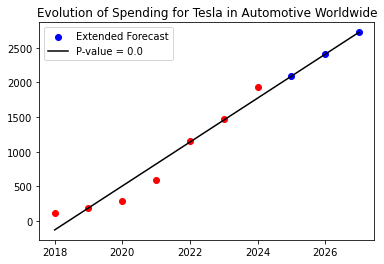

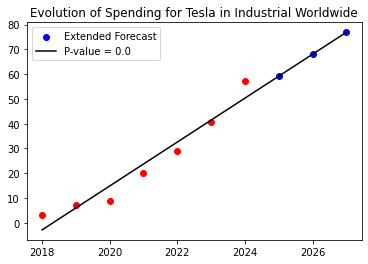

In [295]:
plot_reg(clean, "Tesla", "all")

## Merging New data

In [318]:
market = pd.read_csv("./Market.csv")
market.rename(columns = {"Submarket" : "SubMarket"}, inplace=True)
clean.rename(columns = {"PeriodCode" : "Year"}, inplace = True)
market.Market = market.Market.apply(lambda x : x[:-len(" Categories")])
tries = market.loc[:, ["Market", "Market size"]].groupby("Market").sum().reset_index()

In [319]:
tries

,Market,Market size
0,Automotive Electronics,421620.200
1,Computing & Data Storage,112572.872
2,Consumer Electronics,130933.900
3,Industrial Electronics,137679.590
4,Wired Communications,81096.972
5,Wireless Communications,748486.514


In [321]:
clean.Market.unique()

array(['Industrial', 'Automotive', 'Computer Peripherals & Storage',
       'Wireless Communications', 'Computer Platforms', 'Consumer',
       'Wired Communications'], dtype=object)

In [320]:
final  = clean.merge(tries, how = 'left', on = ['Market'])
final

,Region,CompanyName,Device,Market,Year,Value,SubMarket,Market size
0,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,2018,0.8392,Medical,NaN
1,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,2019,0.8849,Medical,NaN
2,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,2020,1.0651,Medical,NaN
3,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,2021,1.8081,Medical,NaN
4,Americas,Abbott Laboratories,Amplifier/Comparator,Industrial,2022,2.0692,Medical,NaN
...,...,...,...,...,...,...,...,...
78675,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,2023,0.0000,Other Wireless,748486.514
78676,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,2024,0.0000,Handset,748486.514
78677,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,2024,0.0000,Infrastructure,748486.514
78678,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,2024,0.0000,Media Tablets,748486.514


In [310]:
final['Market size'].unique()

array([nan])